In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import main

# Preprocessing Dataset

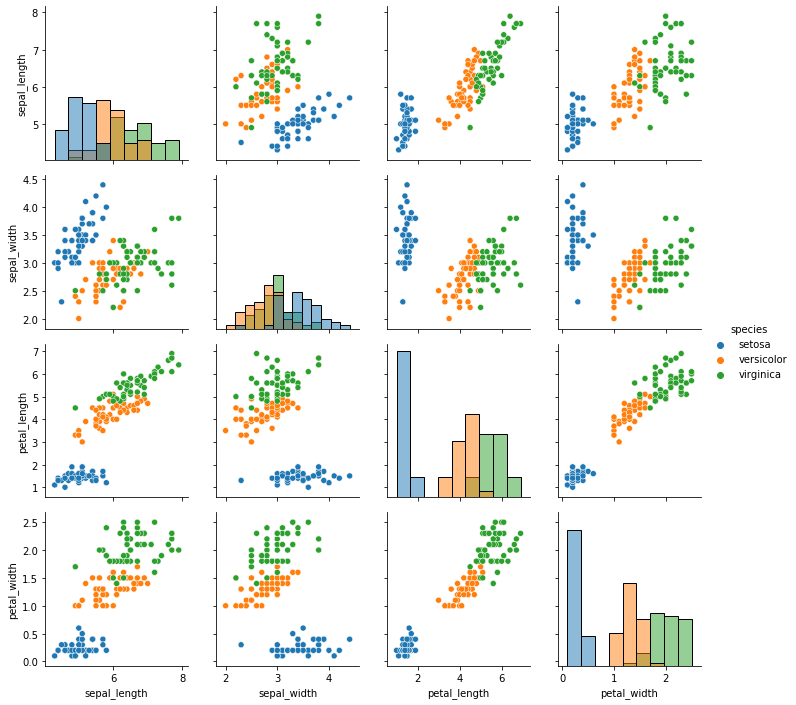

In [3]:
feature, target = load_iris(return_X_y=True)
feature_train, feature_test, target_train, target_test = train_test_split(feature,target,test_size=0.3,random_state=42)

Iris = sns.load_dataset("iris")
g = sns.PairGrid(Iris, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Gaussian Naive Bayes

97.77777777777777


Text(0.5, 1, 'Confusion Matrix for GaussianNaiveBayse')

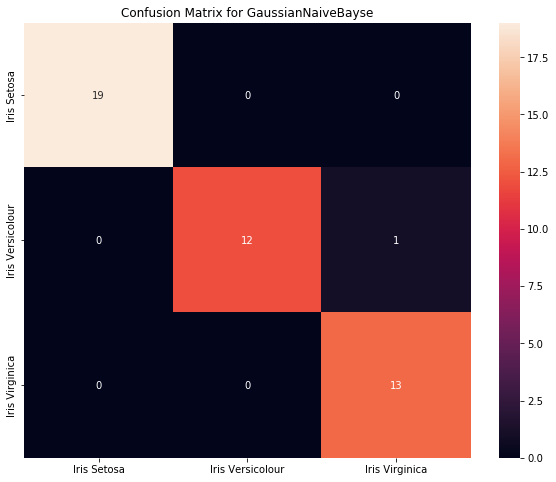

In [5]:
gnb = main.GaussianNB(feature_train,target_train)
gnb_pred = gnb.predict(feature_test)
gnb_acc = (gnb_pred == target_test).sum()/len(gnb_pred) * 100
print(gnb_acc)

cm = confusion_matrix(target_test, gnb_pred)
df_cm = pd.DataFrame(cm,['Iris Setosa','Iris Versicolour','Iris Virginica'],['Iris Setosa','Iris Versicolour','Iris Virginica'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)
plt.title("Confusion Matrix for GaussianNaiveBayse")

# Random Forest

## Effect of Tree's Depth

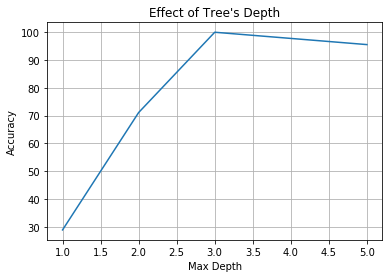

In [8]:
depth_acc = []
for i in range(1,6):
    rf = main.RandomForest(feature_train,target_train,3,i)
    rf.fit()
    rf_pred = rf.predict(feature_test)
    rf_acc = (rf_pred == target_test).sum()/len(rf_pred) * 100
    depth_acc.append(rf_acc)

plt.plot(range(1,6),depth_acc)
plt.title("Effect of Tree's Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid()

## Effect of No. Tree

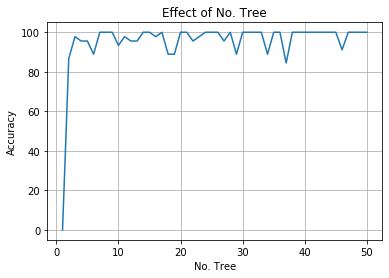

In [9]:
tree_no_acc = [0]
for i in range(1,50):
    rf = main.RandomForest(feature_train,target_train,i,3)
    rf.fit()
    rf_pred = rf.predict(feature_test)
    rf_acc = (rf_pred == target_test).sum()/len(rf_pred) * 100
    tree_no_acc.append(rf_acc)

plt.plot(range(1,51),tree_no_acc)
plt.title("Effect of No. Tree")
plt.xlabel("No. Tree")
plt.ylabel("Accuracy")
plt.grid()

According to the charts we use below values for hyperparams. :

max_depth = 3

Tree_no = 3

100.0


Text(0.5, 1, 'Confusion Matrix for Random Forest')

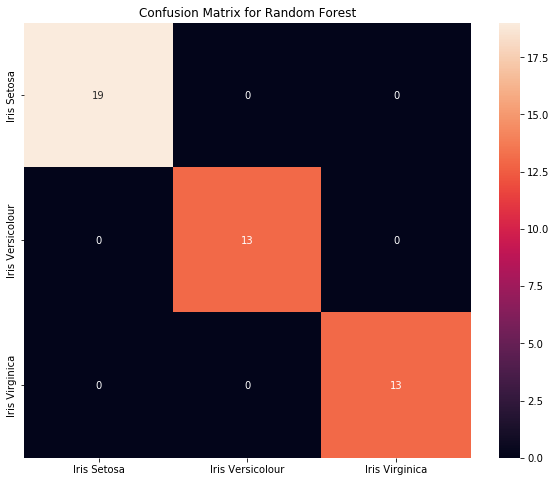

In [12]:
rf = main.RandomForest(feature_train,target_train,3,3)
rf.fit()
rf_pred = rf.predict(feature_test)
rf_acc = (rf_pred == target_test).sum()/len(rf_pred) * 100
print(rf_acc)

cm = confusion_matrix(target_test, rf_pred)
df_cm = pd.DataFrame(cm,['Iris Setosa','Iris Versicolour','Iris Virginica'],['Iris Setosa','Iris Versicolour','Iris Virginica'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)
plt.title("Confusion Matrix for Random Forest")

# KNN

## Effect of K

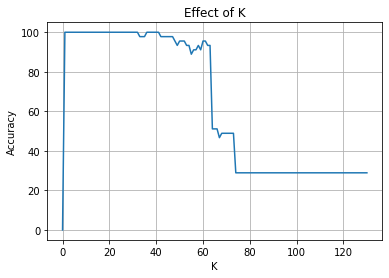

In [13]:
k_acc = [0]
for i in range(1,131):
    knn = main.Knn(feature_train,target_train)
    knn_pred = knn.query(feature_test,k=i)
    knn_acc = (knn_pred == target_test).sum()/len(knn_pred) * 100
    k_acc.append(knn_acc)

plt.plot(range(131),k_acc)
plt.title("Effect of K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()

According to the chart K=3 is best choice.

100.0


Text(0.5, 1, 'Confusion Matrix for KNN')

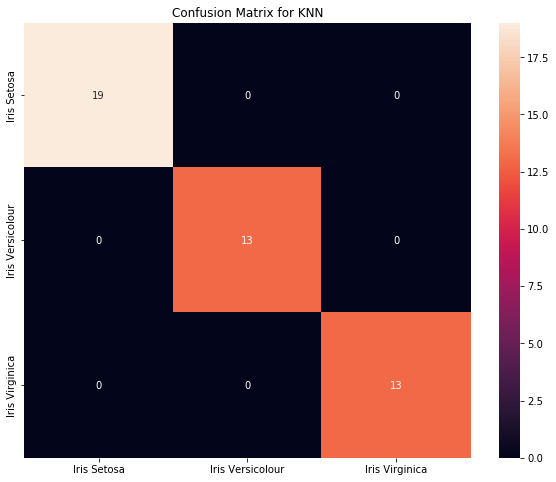

In [15]:
knn = main.Knn(feature_train,target_train)
knn_pred = knn.query(feature_test,k=3)
knn_acc = (knn_pred == target_test).sum()/len(knn_pred) * 100
print(knn_acc)

cm = confusion_matrix(target_test, knn_pred)
df_cm = pd.DataFrame(cm,['Iris Setosa','Iris Versicolour','Iris Virginica'],['Iris Setosa','Iris Versicolour','Iris Virginica'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)
plt.title("Confusion Matrix for KNN")

# Final Results
|      Algorithm     | Accuracy |
|:------------------:|:--------:|
| GaussianNaiveBayse |  97.77 % |
|    RandomForest    |   100 %  |
|         KNN        |   100 %  |